# Análise Descritiva - Terceiro Estágio [Jerônimo de Castro]

In [95]:
import pandas as pd

# Importação do arquivo horarios_ufersa.csv para o Pandas
df_horarios_ufersa = pd.read_csv('horarios_ufersa.csv', names = ['SIAPE', 'NIVEL', 'PERIODO', 'COD_DISCIPLINA', 'NOME_DISCIPLINA', 'CARGA_HORARIA', 'HORARIOS'])

# Importação do arquivo professors_information.csv para o Pandas
df_info_professores = pd.read_csv('professors_information.csv', names = ['SIAPE', 'NOME', 'DEPARTAMENTO', 'LINK_FOTO', 'LINK_PERFIL'])

## H1 - Quantas vezes uma disciplina foi ministrada no sábado pela manhã, tarde ou noite por período?

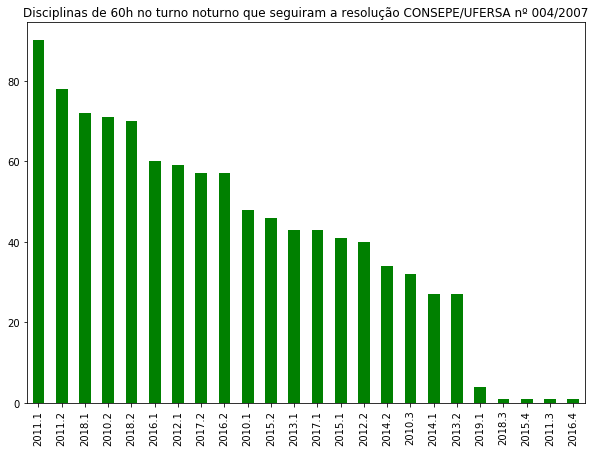

In [96]:
# Criação de DataFrame com disciplinas ministradas no sábado pela manhã
df_sabado_manha = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7M')]

# Criação de DataFrame com disciplinas ministradas no sábado pela tarde
df_sabado_tarde = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7T')]

# Criação de DataFrame com disciplinas ministradas no sábado a noite
df_sabado_noite = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('7N')]

# Concatenação dos DataFrames dos três turno
df_sabado = pd.concat([df_sabado_manha, df_sabado_tarde, df_sabado_noite])

# Plotagem do gráfico
df_sabado["PERIODO"].value_counts().plot.bar(title='Disciplinas de 60h no turno noturno que seguiram a resolução CONSEPE/UFERSA nº 004/2007', color='g', figsize=(10, 7))

## H2 - Quantas disciplinas de 60h ministradas no turno noturno seguiram a resolução CONSEPE/UFERSA nº 004/2007 no período 2015.1 a 2018.2?

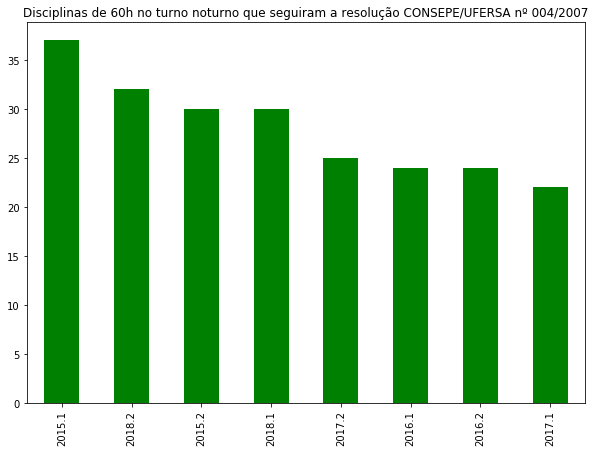

In [97]:
# Busca no DataFrame df_horarios_ufersa das disciplinas que seguiram a resolução CONSEPE/UFESA nº 004/2007
df_h2 = df_horarios_ufersa[((df_horarios_ufersa['HORARIOS'] == '2N12 4N12') | (df_horarios_ufersa['HORARIOS'] == '2N34 5N34') | (df_horarios_ufersa['HORARIOS'] == '3N12 6N12') | (df_horarios_ufersa['HORARIOS'] == '3N34 5N12') | (df_horarios_ufersa['HORARIOS'] == '4N34 5N34')) & (df_horarios_ufersa['CARGA_HORARIA'] == '60h') & ((df_horarios_ufersa['PERIODO'] >= 2015.1) & (df_horarios_ufersa['PERIODO'] <= 2018.2))]

# Plotagem do gráfico
df_h2["PERIODO"].value_counts().plot.bar(title='Disciplinas de 60h no turno noturno que seguiram a resolução CONSEPE/UFERSA nº 004/2007', color='g', figsize=(10, 7))

## H3 - Qual a quantidade de disciplinas ofertadas por carga horária no período 2018.2?

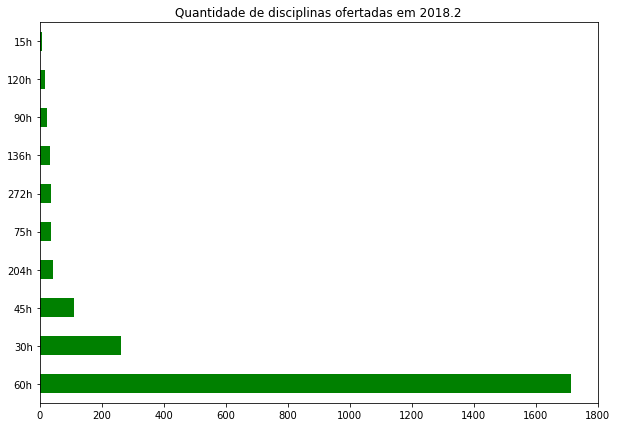

In [98]:
# Função que retorna um DataFrame com as disciplinas ofertadas no período passado como parâmetro
def qtd_disciplinas_periodo(periodo):
    df = df_horarios_ufersa[(df_horarios_ufersa['PERIODO'] == periodo)]
    return df

# Busca pelas disciplinas ofertadas em 2018.2
df_h3 = qtd_disciplinas_periodo(2018.2)

# Plotagem do gráfico

df_h3['CARGA_HORARIA'].value_counts().plot.barh(title='Quantidade de disciplinas ofertadas em 2018.2', color='g', figsize=(10, 7))

## H4 - Qual a distribuição percentual de oferta das disciplinas de programação (grade BSI)?

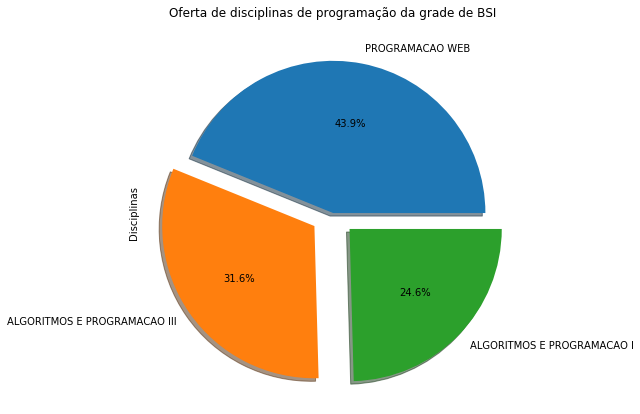

In [99]:
# Renomeando as disciplinas de PROGRAMAÇÃO WEB (com acento) para PROGRAMACAO WEB 
df_horarios_ufersa = df_horarios_ufersa.replace('PROGRAMAÇÃO WEB', 'PROGRAMACAO WEB')
df_horarios_ufersa = df_horarios_ufersa.replace('PROGRAMAÇÃO WEB', 'PROGRAMACAO WEB')
df_horarios_ufersa = df_horarios_ufersa.replace('PROGRAMACAO WEB (1206139)', 'PROGRAMACAO WEB')

# Busca pelas disciplinas ALGORITMOS E PROGRAMACAO I, ALGORITMOS E PROGRAMACAO II e ALGORITMOS E PROGRAMACAO III 
df_AP1_3 = df_h4[df_h4.NOME_DISCIPLINA.str.contains('ALGORITMOS E PROGRAMACAO')]

# Busca pela disciplina de PROGRAMACAO WEB
df_WEB = df_h4[df_h4.NOME_DISCIPLINA.str.contains('PROGRAMACAO WEB')]

# Concatenação dos Dataframes contendo as disciplinas de AP1, AP2, AP3 e PROGRAMACAO WEB
df_h4 = pd.concat([df_AP1_3, df_WEB])

df_h4['NOME_DISCIPLINA'].value_counts().plot.pie(title = 'Oferta de disciplinas de programação da grade de BSI', explode=(0, 0.15, 0.15), label='Disciplinas', shadow=True, autopct='%.1f%%', figsize=(7, 7))

## H5 - Quais disciplinas o docente JOSE GILDO DE ARAUJO JUNIOR ministra/ministrou? Quantas vezes?

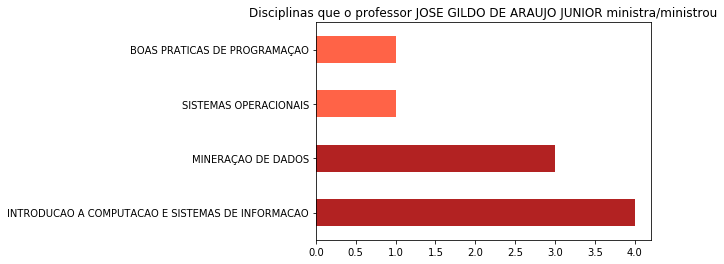

In [100]:
# Função que busca o SIAPE do professor pelo nome passado como parâmetro
def busca_siape_professor(nome_professor):
    siape = int(df_info_professores.SIAPE[df_info_professores.NOME == nome_professor])
    return siape

# Busca pelo nome do professor
siape_professor = busca_siape_professor('JOSE GILDO DE ARAUJO JUNIOR')

# Busca pelas disciplinas ministradas pelo professor
df_h5 = df_horarios_ufersa[(df_horarios_ufersa.SIAPE == siape_professor)]

# Plotagem do gráfico
df_h5['NOME_DISCIPLINA'].value_counts().plot.barh(color = ['#B22222', '#B22222', '#FF6347', '#FF6347'], title = 'Disciplinas que o professor JOSE GILDO DE ARAUJO JUNIOR ministra/ministrou')

## H6 - Quantos profissionais docentes a Ufersa possui por departamento?

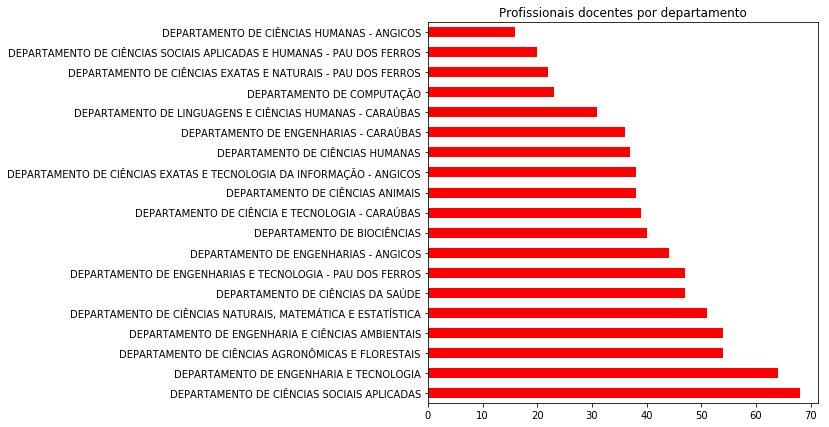

In [101]:
# Plotagem do gráfico com a quantidade dos docentes por departamento
df_info_professores.DEPARTAMENTO.value_counts().plot.barh(title='Profissionais docentes por departamento', color='red', figsize=(7, 7))

## H7 - Quais os horários de disciplinas que foram ministradas nos três turnos? Quantas vezes?

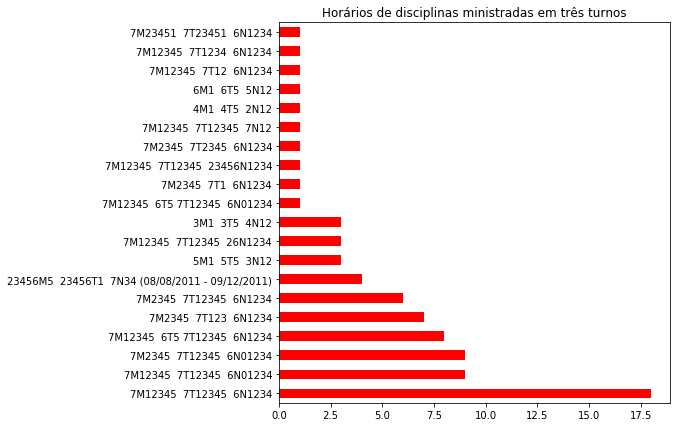

In [102]:
# Busca pelas disciplinas ministradas no turno da manhã
df_manha = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('M')]

# Busca pelas disciplinas ministradas no turno da tarde
df_manha_tarde = df_manha[df_manha.HORARIOS.str.contains('T')]

# Busca pelas disciplinas ministradas no turno da noite
df_manha_tarde_noite = df_manha_tarde[df_manha_tarde.HORARIOS.str.contains('N')]

# Plotagem do gráfico
df_manha_tarde_noite.HORARIOS.value_counts().plot.barh(title='Horários de disciplinas ministradas em três turnos', color='red', figsize=(7, 7))

## H8 - Quais docentes lecionaram disciplinas de pós-graduação no período 2018.1 e 2018.2 no turno noturno? Quantas disciplinas foram lecionadas por cada um?

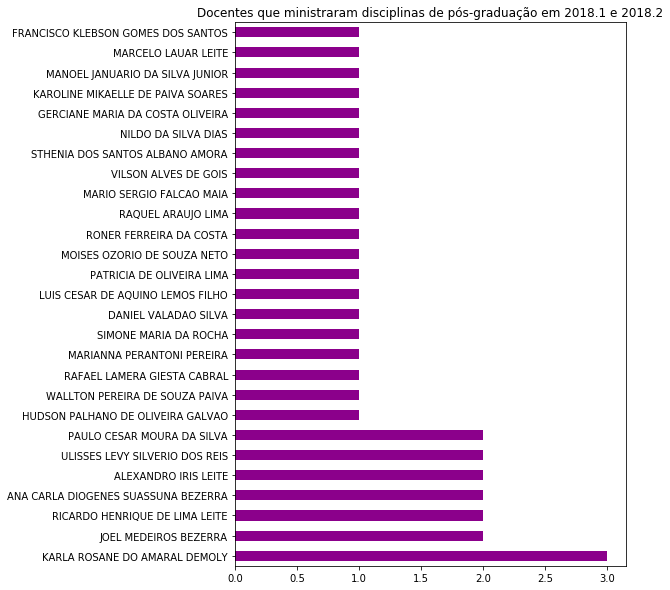

In [103]:
# Função que busca o nome do docente pelo SIAPE
def busca_nome_por_siape(numero_siape):
    nome = df_info_professores.NOME[df_info_professores.SIAPE == numero_siape].tolist()[0]
    return nome

# Busca pelos horários do turno noturno
df_h8 = df_horarios_ufersa[df_horarios_ufersa.HORARIOS.str.contains('N')]
# Busca pelas turmas da pós-graduação nos períodos 2018.1 e 2018.2
df_h8 = df_h8[(df_h8.NIVEL == 'turmas-pos') & ((df_h8.PERIODO == 2018.1) | (df_h8.PERIODO == 2018.2))]

# Lista com o SIAPE dos docentes
lista_siape = list(set(df_h8.SIAPE.tolist()))

# Busca do nome do docente pelo SIAPE
lista_nomes = []
for codigo in lista_siape:
    nome = busca_nome_por_siape(codigo)
    lista_nomes.append(nome)

# Substituição do código dos docentes pelos seus respectivos nomes
i = 0
tamanho_lista = len(lista_siape)
while i < tamanho_lista:
    df_h8 = df_h8.replace(lista_siape[i] , lista_nomes[i])
    i += 1

# Plotagem do gráfico
df_h8.SIAPE.value_counts().plot.barh(title='Docentes que ministraram disciplinas de pós-graduação em 2018.1 e 2018.2', color='#8B008B', figsize=(7, 10))

## H9 - Quais as 10 disciplinas mais ofertadas pela Ufersa?

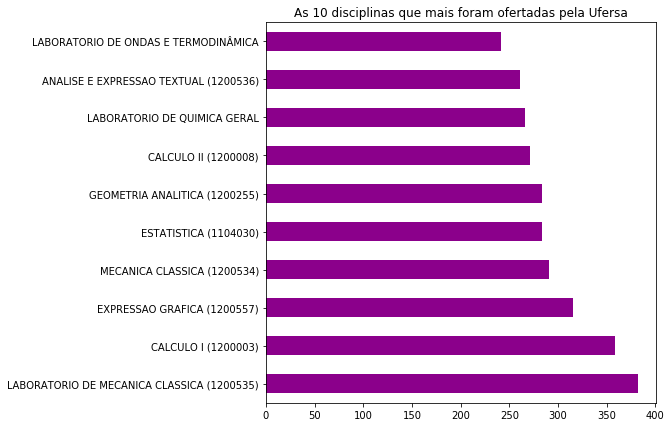

In [104]:
# Contagem e plotagem do gráfico com as 10 disciplinas que mais foram ofertadas pela Ufersa
df_horarios_ufersa.NOME_DISCIPLINA.value_counts().head(10).plot.barh(title='As 10 disciplinas que mais foram ofertadas pela Ufersa', color='#8B008B', figsize=(7, 7))

## H10 - Quais os cinco períodos que mais ofertaram disciplinas?

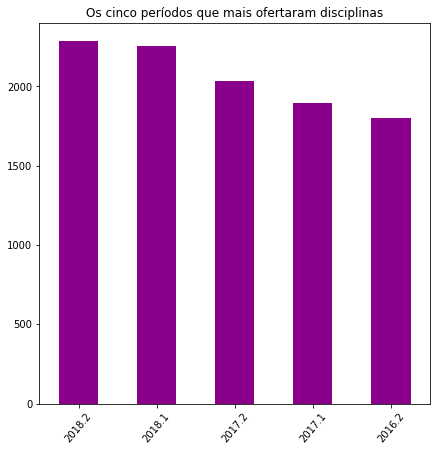

In [105]:
# Contagem dos cinco períodos que mais ofertaram disciplinas e plotagem do gráfico 
df_horarios_ufersa.PERIODO.value_counts().head(5).plot.bar(title='Os cinco períodos que mais ofertaram disciplinas', color='#8B008B', figsize=(7, 7), rot=50)